In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pydot
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras import layers 
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical

from scikeras.wrappers import KerasClassifier



In [2]:
#!pip install pydot
#!pip install keras==2.7.0

In [3]:
#!pip install tensorflow==2.17.0

In [4]:
#!pip install scikeras

In [5]:
   # Load mnist dataset
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit) = mnist.load_data()

In [11]:
x_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

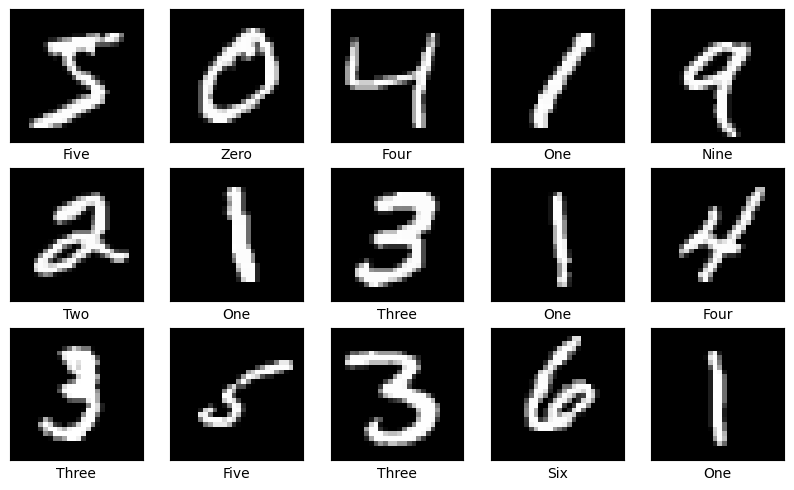

In [15]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [16]:
x_train_digit.shape

(60000, 28, 28)

In [19]:
y_test_digit.shape

(10000,)

# Preprocessing the input-Converting 3d to 2d

In [22]:
x_train_digit = x_train_digit.reshape(60000, 784)
x_test_digit = x_test_digit.reshape(10000, 784)

In [24]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [30]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [32]:
#Creating base neural network
model = keras.Sequential([
    #Dense layer1
    layers.Dense(256, activation='relu', input_shape=(784,)), # 28*28 = 784 , 256 = no.of neurons
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),

    #Dense layer 2
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),

    #Dense layer 3
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),# to normalize images in batches

    #Creates output layer, 10 = no.of classes
    layers.Dense(10,activation='sigmoid'),
])

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [38]:
history=model.fit(x_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(x_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7355 - loss: 4.3663 - val_accuracy: 0.8991 - val_loss: 0.3872
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9191 - loss: 0.2997 - val_accuracy: 0.9391 - val_loss: 0.2390
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9454 - loss: 0.1947 - val_accuracy: 0.9402 - val_loss: 0.2262
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9545 - loss: 0.1604 - val_accuracy: 0.9515 - val_loss: 0.1924
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9623 - loss: 0.1272 - val_accuracy: 0.9527 - val_loss: 0.1855
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9661 - loss: 0.1151 - val_accuracy: 0.9585 - val_loss: 0.1615
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9695 - loss: 0.1052 - val_accuracy: 0.9650 - val_loss: 0.1370
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9751 - loss: 0.0837 - val_accuracy: 0.

In [44]:
test_loss_digit, test_acc_digit = model.evaluate(x_test_digit, y_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9529 - loss: 0.1988


In [46]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9602


In [48]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
y_predict

array([[1.0688046e-09, 2.0329264e-01, 2.6460263e-01, ..., 1.0000000e+00,
        2.7692909e-04, 9.9998677e-01],
       [9.3861288e-01, 4.8009232e-01, 1.0000000e+00, ..., 9.9994236e-01,
        6.7360818e-01, 3.0134883e-02],
       [6.4005508e-07, 9.9999738e-01, 4.3525968e-02, ..., 9.9923348e-01,
        9.6146041e-01, 9.2777646e-01],
       ...,
       [5.6569752e-11, 1.2879372e-01, 1.6840434e-03, ..., 8.2176745e-02,
        2.1880114e-02, 9.9979645e-01],
       [6.1195635e-07, 2.0046664e-09, 4.0666602e-12, ..., 4.1055778e-10,
        6.9600241e-03, 3.3822766e-13],
       [4.4143444e-08, 8.6359106e-12, 1.3216498e-08, ..., 1.1384117e-13,
        5.0258432e-08, 2.4217142e-04]], dtype=float32)

In [52]:
y_predict[0]

array([1.0688046e-09, 2.0329264e-01, 2.6460263e-01, 9.7104579e-01,
       1.7197037e-02, 9.9582570e-03, 1.9903324e-14, 1.0000000e+00,
       2.7692909e-04, 9.9998677e-01], dtype=float32)

In [60]:
y_predicts = np.argmax(y_predict,axis=1)
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [62]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [64]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
y_pre=pd.DataFrame(y_predicts)

In [68]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


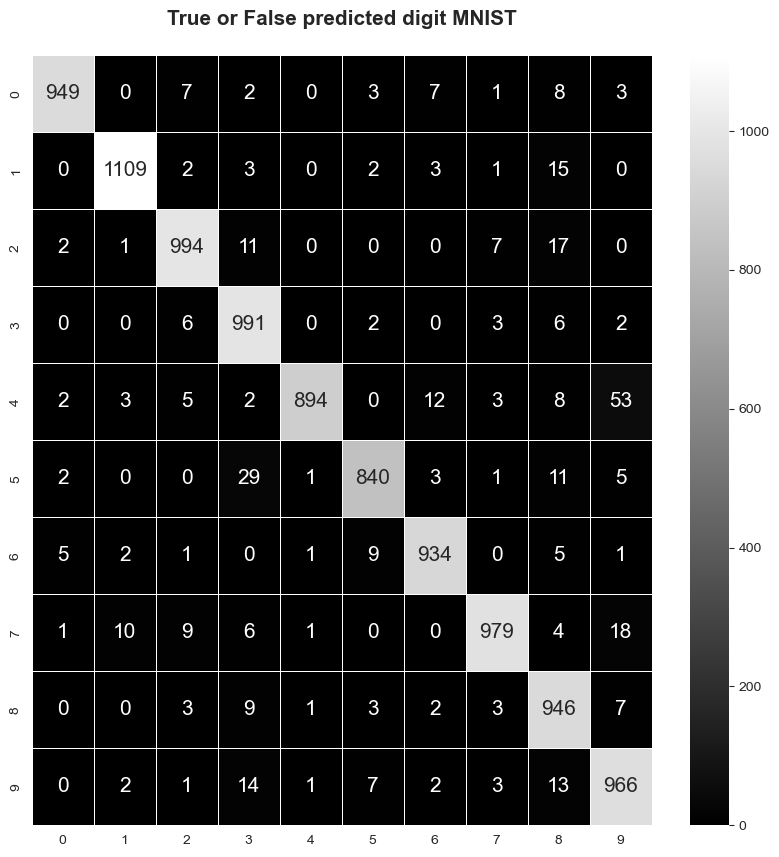

In [76]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
#plt.style.use('seaborn-deep')
sns.set_style("darkgrid")        # Or "white", "ticks", etc.
sns.set_palette("deep")   
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.93      0.98      0.95      1010
           4       0.99      0.91      0.95       982
           5       0.97      0.94      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.92      0.97      0.94       974
           9       0.92      0.96      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [80]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


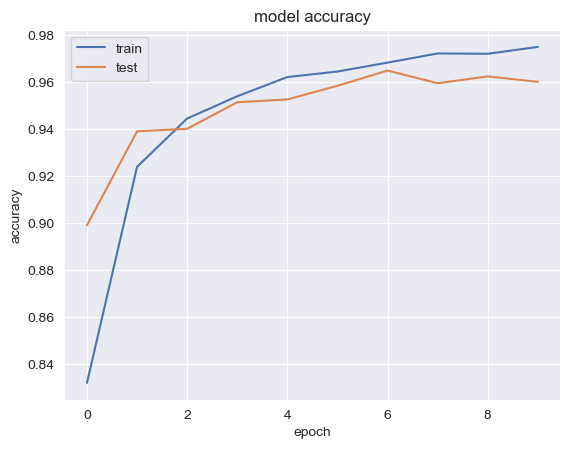

In [82]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

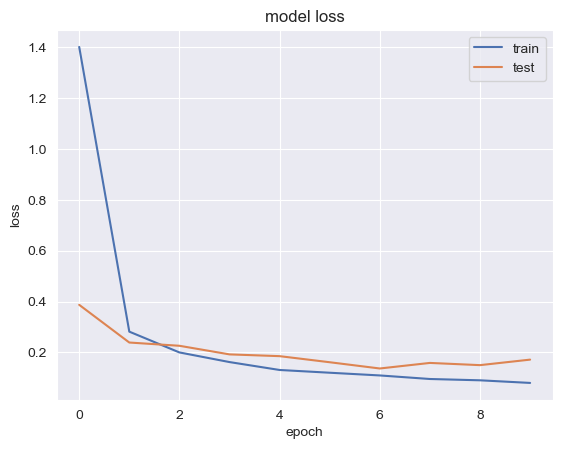

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [126]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test_digit[[4]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [128]:
y_predict_single

array([[3.3949199e-08, 1.5844667e-04, 2.2158714e-07, 1.3353041e-09,
        9.9820209e-01, 3.9573643e-11, 5.8365279e-10, 1.0916200e-03,
        1.7923396e-06, 9.1758293e-01]], dtype=float32)

In [130]:
y_predicts_single

array([4], dtype=int64)

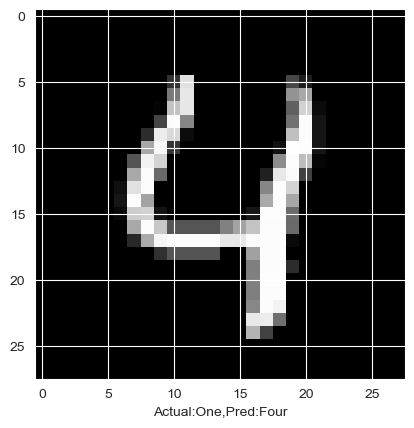

In [132]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[4].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()
